# Suvendu Bista
**Course:** Advanced Big Data and Data Mining (MSCS-634-B01)  
**Lab Title:** Clustering Analysis Using K-Means and K-Medoids Algorithms

In [6]:
# Step 1: Load and Prepare the Dataset 
from sklearn.datasets import load_wine
import pandas as pd

wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names
target_names = wine.target_names

# Create DataFrame for exploration
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

In [7]:
# Examine features
print(wine.DESCR)
print("\nFeature names:", feature_names)

# Class distribution
print("\nClass distribution:")
print(df['target'].value_counts())
print("Class names:", target_names)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [8]:
from sklearn.preprocessing import StandardScaler

# Standardize the features (Z-score normalization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Step 2: Implement K-Means Clustering

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

In [10]:
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Silhouette Score
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_silhouette:.3f}")

# Adjusted Rand Index
kmeans_ari = adjusted_rand_score(y, kmeans_labels)
print(f"K-Means ARI: {kmeans_ari:.3f}")

K-Means Silhouette Score: 0.285
K-Means ARI: 0.897


In [13]:
# Step 3: Implement K-Medoids Clustering 

from sklearn_extra.cluster import KMedoids

kmedoids = KMedoids(n_clusters=3, random_state=42)
kmedoids_labels = kmedoids.fit_predict(X_scaled)

In [14]:
# Silhouette Score
kmedoids_silhouette = silhouette_score(X_scaled, kmedoids_labels)
print(f"K-Medoids Silhouette Score: {kmedoids_silhouette:.3f}")

# Adjusted Rand Index
kmedoids_ari = adjusted_rand_score(y, kmedoids_labels)
print(f"K-Medoids ARI: {kmedoids_ari:.3f}")

K-Medoids Silhouette Score: 0.266
K-Medoids ARI: 0.726


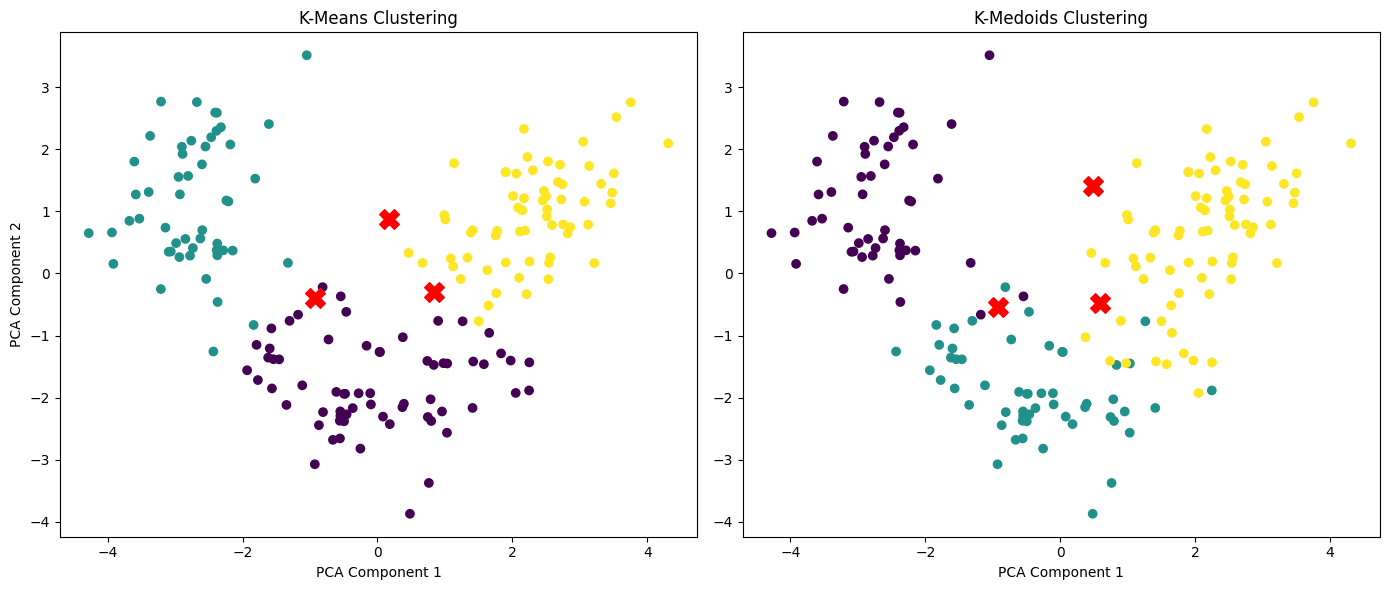

In [17]:
# Step 4: Visualize and Compare Results 

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# K-Means plot
ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis')
ax1.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, marker='X', c='red')
ax1.set_title('K-Means Clustering')
ax1.set_xlabel('PCA Component 1')
ax1.set_ylabel('PCA Component 2')

# K-Medoids plot
ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=kmedoids_labels, cmap='viridis')
ax2.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:, 1], 
            s=200, marker='X', c='red')
ax2.set_title('K-Medoids Clustering')
ax2.set_xlabel('PCA Component 1')

plt.tight_layout()
plt.show()